In [1]:
from nltk.tokenize import sent_tokenize, word_tokenize, wordpunct_tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import pandas as pd
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.preprocessing import normalize 
from yellowbrick.cluster import InterclusterDistance
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn import metrics
import pickle

In [2]:
raw_data_1 = pd.read_csv("./Preprocessing.csv")

raw_data_1.head(100)

,Nama Paket,Instansi,preprocessing
0,Tenaga Ahli Data Driven Kegiatan Koordinasi Se...,Kementerian Perencanaan Pembangunan Nasional,tenaga ahli data driven kegiatan koordinasi se...
1,Tenaga Ahli IT Analisa Sistem Kegiatan Koord...,Kementerian Perencanaan Pembangunan Nasional,tenaga ahli it analisa sistem kegiatan koordin...
2,Tenaga Ahli Senior Monitoring dan Evaluasi Str...,Kementerian Perencanaan Pembangunan Nasional,tenaga ahli senior monitoring evaluasi strateg...
3,Tenaga Ahli Senior Perencanaan Strategic Natio...,Kementerian Perencanaan Pembangunan Nasional,tenaga ahli senior perencanaan strategic natio...
4,Tenaga Ahli Muda Bidang Energy Policy Kegiatan...,Kementerian Perencanaan Pembangunan Nasional,tenaga ahli muda bidang energy policy kegiatan...
...,...,...,...
95,Pengadaan Generator Set 100 Kva / 80 Kw spse 4...,PDAM Tirta Moedal,pengadaan generator set 100 kva 80 kw spse 4.3...
96,Pengadaan Gate Valve Tahun 2019 Tender Ulang s...,PDAM Tirta Aji Kabupaten Wonosobo,pengadaan gate valve tahun 2019 tender ulang s...
97,Management Pressur Jaringan Distribusi Tender ...,PDAM Tirta Aji Kabupaten Wonosobo,management pressur jaringan distribusi tender ...
98,Pengadaan Pemancar FM 1 KW + Antena + Coaxcial...,Lembaga Penyiaran Radio Republik Indonesia,pengadaan pemancar fm 1 kw antena coaxcial ins...


In [3]:
raw_data_1.shape

(2928, 3)

In [4]:
vectorScaler = pickle.load(open('vectorScaler.pickle', 'rb'))
vectorNormalize = normalize(vectorScaler)

In [5]:
kmeans_obj = pickle.load(open('kmeans.pickle', 'rb'))
result_clustering = kmeans_obj.predict(vectorNormalize)

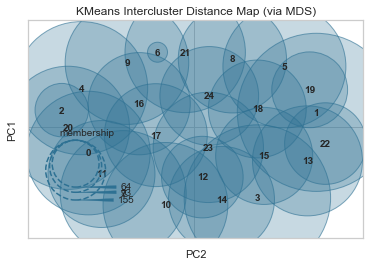

In [6]:
visualizer_kmeans = InterclusterDistance(kmeans_obj, random_state = 50)
visualizer_kmeans.fit(vectorNormalize)
visualizer_kmeans.finalize()

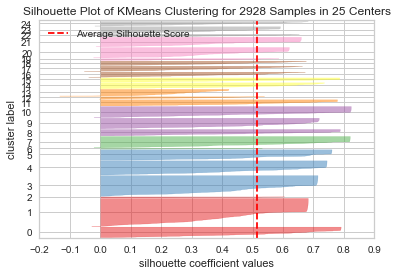

In [7]:
visualizer_kmeans_silhouette = SilhouetteVisualizer(kmeans_obj, color='yellowbrick')
visualizer_kmeans_silhouette.fit(vectorNormalize)
visualizer_kmeans_silhouette.show()

In [8]:
labels = kmeans_obj.labels_
silhouette_score = metrics.silhouette_score(vectorNormalize, labels, metric='euclidean')
silhouette_score

0.5160464887257359

In [9]:
raw_data_1['clustering'] = result_clustering
raw_data_1

,Nama Paket,Instansi,preprocessing,clustering
0,Tenaga Ahli Data Driven Kegiatan Koordinasi Se...,Kementerian Perencanaan Pembangunan Nasional,tenaga ahli data driven kegiatan koordinasi se...,4
1,Tenaga Ahli IT Analisa Sistem Kegiatan Koord...,Kementerian Perencanaan Pembangunan Nasional,tenaga ahli it analisa sistem kegiatan koordin...,4
2,Tenaga Ahli Senior Monitoring dan Evaluasi Str...,Kementerian Perencanaan Pembangunan Nasional,tenaga ahli senior monitoring evaluasi strateg...,4
3,Tenaga Ahli Senior Perencanaan Strategic Natio...,Kementerian Perencanaan Pembangunan Nasional,tenaga ahli senior perencanaan strategic natio...,4
4,Tenaga Ahli Muda Bidang Energy Policy Kegiatan...,Kementerian Perencanaan Pembangunan Nasional,tenaga ahli muda bidang energy policy kegiatan...,4
...,...,...,...,...
2923,Jasa Kebersihan di Lingkungan Sekretariat Kabi...,Sekretariat Kabinet,jasa kebersihan lingkungan sekretariat kabinet...,7
2924,"Pemeliharaan Prasarana TIK (Jaringan Komputer,...",Kementerian Perencanaan Pembangunan Nasional,pemeliharaan prasarana tik jaringan komputer p...,1
2925,Pemeliharaan Sistem Transportasi Gedung spse 3...,Kementerian Perencanaan Pembangunan Nasional,pemeliharaan sistem transportasi gedung spse 3...,1
2926,Pemeliharaan Taman spse 3 Jasa Lainnya - TA 2...,Kementerian Perencanaan Pembangunan Nasional,pemeliharaan taman spse 3 jasa lainnya ta 2014...,1


In [10]:
tfidfVectorizer = TfidfVectorizer()
def search_weights(search_keys):  
    search_query_weights = search_keys.lower()
    tfidf_weights_matrix = tfidfVectorizer.fit_transform(raw_data_1['preprocessing'])
    search_query_weights = tfidfVectorizer.transform([search_keys])

    return search_query_weights, tfidf_weights_matrix

In [11]:
weights_search, tfidf_weights = search_weights('ahli tenaga')
print(weights_search)

  (0, 3132)	0.6983572577284589
  (0, 515)	0.7157493559745527


In [12]:
def cos_similarity(search_query_weights, tfidf_weights_matrix):

    cosine_distance = cosine_similarity(search_query_weights, tfidf_weights_matrix)
    similarity_list = cosine_distance[0]

    return similarity_list

In [13]:
similarity = cos_similarity(weights_search, tfidf_weights)
df = pd.DataFrame({'res':similarity})
df = df.sort_values(by=['res'],ascending=False)

index= []
for i in df.index: 
    index.append(i)

for i in index:
    print(raw_data_1['Nama Paket'].loc[i])
    print('\n')

TENAGA AHLI BIDANG EVALUASI spse 3  Jasa Konsultansi Perorangan - TA 2018 - Seleksi Sederhana - Pascakualifikasi Satu File KualitasNilai Kontrak : Nilai Kontrak belum dibuat


Tenaga Ahli Keuangan Tender Ulang spse 3  Jasa Konsultansi Perorangan - TA 2017 - Seleksi Sederhana - Pascakualifikasi Satu File KualitasNilai Kontrak : Nilai Kontrak belum dibuat


Tenaga Ahli Ekonomi Wilayah spse 4.3  Jasa Konsultansi Perorangan - TA 2019 - Seleksi - Pascakualifikasi Dua File KualitasNilai Kontrak : Nilai Kontrak belum dibuat


Tenaga Ahli KPBU 2 spse 3  Jasa Konsultansi Perorangan - TA 2018 - Seleksi Sederhana - Pascakualifikasi Satu File KualitasNilai Kontrak : Nilai Kontrak belum dibuat


Tenaga Ahli Komunikasi Publik spse 3  Jasa Konsultansi Perorangan - TA 2018 - Seleksi Sederhana - Pascakualifikasi Satu File KualitasNilai Kontrak : Nilai Kontrak belum dibuat


Pengadaan Tenaga Ahli Komunikasi KPPIP spse 3  Jasa Konsultansi Perorangan - TA 2016 - Seleksi Sederhana - Pascakualifikasi Satu F

 Tender Ulang spse 3  Jasa Konsultansi Perorangan - TA 2015 - Seleksi Sederhana - Pascakualifikasi Satu File KualitasNilai Kontrak : Nilai Kontrak belum dibuat


Tenaga Teknis Bidang Perencanaan dan Pengembangan Program Dalam Mendukung Koordinasi Percepatan Pembangunan Daerah Tertinggal dan Khusus (P2DTK) Tahun Anggaran 2015 spse 3  Jasa Konsultansi Perorangan - TA 2015 - Seleksi Sederhana - Pascakualifikasi Satu File KualitasNilai Kontrak : Nilai Kontrak belum dibuat


Tanaga Ahli Muda Manajemen SDA Kegiatan Pengelolaan Hibah Millennium Challenge Corporation (MCC) Tahun Anggaran 2015
 Tender Ulang spse 3  Jasa Konsultansi Perorangan - TA 2015 - Seleksi Sederhana - Pascakualifikasi Satu File KualitasNilai Kontrak : Nilai Kontrak belum dibuat


Tenaga Teknis Bidang Monitoring Dan Evaluasi  Dalam Mendukung Tim Koordinasi Perencanaan Pengendalian Penanganan Bencana (P3B) Tahun 2015 spse 3  Jasa Konsultansi Perorangan - TA 2015 - Seleksi Sederhana - Pascakualifikasi Satu File KualitasNilai

Rehabilitasi Jalan Dan Drainase Tender Ulang spse 3  Pekerjaan Konstruksi - TA 2014 - Lelang Umum - Pascakualifikasi Satu File Harga Terendah Sistem GugurNilai Kontrak : Nilai Kontrak belum dibuat


Pelatihan dan Sertifikasi Internal ID-SIRTII Tahun 2014 Tender Ulang spse 3  Jasa Lainnya - TA 2014 - Lelang Umum - Pascakualifikasi Dua File Sistem NilaiNilai Kontrak : Nilai Kontrak belum dibuat


Pengadaan Jasa Sewa Disaster Recovery Center Tender Ulang spse 3  Jasa Lainnya - TA 2014 - Lelang Sederhana - Pascakualifikasi Satu File Harga Terendah Sistem GugurNilai Kontrak : Nilai Kontrak belum dibuat


Pembangunan Gedung Kantor LKPP Lanjutan spse 4  Pekerjaan Konstruksi - TA null - Tender Cepat - Pascakualifikasi Satu File Harga Terendah Sistem GugurNilai Kontrak : Nilai Kontrak belum dibuat


Pengadaan Perangkat Jaringan Komputer Gedung Baru LKPP 
 Tender Ulang spse 3  Pengadaan Barang - TA 2015 - Lelang Umum - Pascakualifikasi Satu File Harga Terendah Sistem GugurNilai Kontrak : Nilai K

Konsultan Badan Usaha Penyusunan Materi Pelatihan berdasarkan SK3 PBJP/ Materi Pelatihan Kompetensi/ Program dan Kurikulum/  Pusdiklat PBJ Seleksi Ulang spse 3  Jasa Konsultansi Badan Usaha - TA 2018 - Seleksi Umum - Prakualifikasi Dua File Pagu AnggaranNilai Kontrak : Nilai Kontrak belum dibuat


Pengadaan Operasional Jabatan Eselon II spse 4  Pengadaan Barang - TA 2018 - Tender Cepat - Pascakualifikasi Satu File Harga Terendah Sistem GugurNilai Kontrak : Nilai Kontrak belum dibuat


Paket fasilitasi pelaksanaan ENJ 2018 Tender Ulang spse 3  Jasa Lainnya - TA 2018 - Lelang Sederhana - Pascakualifikasi Satu File Harga Terendah Sistem GugurNilai Kontrak : Nilai Kontrak belum dibuat


Pengadaan Pipa PVC, HDPE, Galvanis Medium Untuk Investasi dan Perbaikan Tender Ulang spse 4  Pengadaan Barang - TA 2018 - Tender Cepat - Pascakualifikasi Satu File Harga Terendah Sistem GugurNilai Kontrak : Rp 783.964.500,00


Pengadaan Seminar kit spse 4  Jasa Lainnya - TA 2018 - Tender Cepat - Pascakualif



Pengadaan Koneksi VPN spse 4  Jasa Lainnya - TA 2017 - Tender Cepat - Pascakualifikasi Satu File Harga Terendah Sistem GugurNilai Kontrak : Nilai Kontrak belum dibuat


Pengadaan Jasa Konsultansi Perorangan Office Manager Komite Percepatan Penyediaan Infrastruktur Prioritas (KPPIP) Tahun Anggaran 2017 spse 3  Jasa Konsultansi Perorangan - TA 2017 - Seleksi Umum - Pascakualifikasi Satu File KualitasNilai Kontrak : Nilai Kontrak belum dibuat


Pengadaan Genset Silent 60 KVA Tender Ulang spse 4  Pengadaan Barang - TA 2016 - Tender Cepat - Pascakualifikasi Satu File Harga Terendah Sistem GugurNilai Kontrak : Rp 184.000.000,00


Energy Liaison pada Sekretariat RAN GRK TA.2017 Tender Ulang spse 3  Jasa Konsultansi Perorangan - TA 2017 - Seleksi Sederhana - Pascakualifikasi Satu File KualitasNilai Kontrak : Nilai Kontrak belum dibuat


SEWA AKSES DIGITAL JOURNAL (CEIC) TA. 2017 spse 3  Jasa Lainnya - TA 2017 - Lelang Sederhana - Pascakualifikasi Satu File Harga Terendah Sistem GugurNilai Ko